In [ ]:
! pip install pingouin
! pip install pandas
! pip install matplotlib
! pip install scipy
! pip install numpy
! pip install seaborn


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns
import pingouin as pg

In [ ]:
data = pd.read_csv("clean_kaggle_data.csv")


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

description_data = data.describe()
description_final = description_data.iloc[:,1:]


print('The descriptive stats for the numerical columns in the data are:')
print()
print(description_final)



The descriptive stats for the numerical columns in the data are:

           Q10             Q19      Q64         Q82
count 47840.00        47840.00 32567.00    47840.00
mean     15.66     13698363.37    11.44    95703.18
std       9.85    513739491.24     8.82   139607.97
min       0.00            1.00     0.00        1.00
25%       8.00        64000.00     5.00    44000.00
50%      13.00       115000.00     9.00    74963.00
75%      20.00       234000.00    16.00   121634.00
max      50.00 100000000000.00    50.00 10319366.00


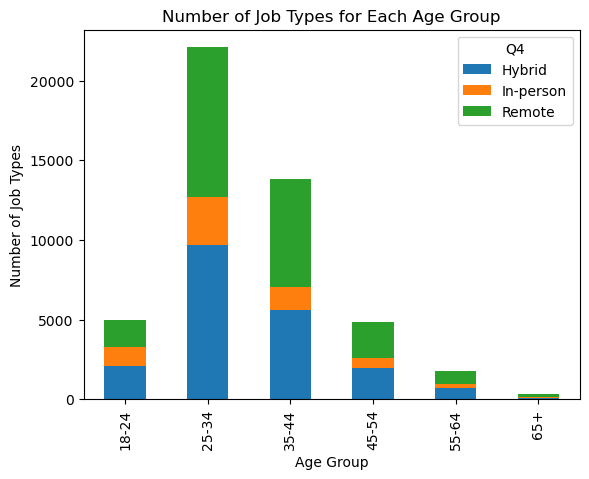

In [ ]:
#Graph 1: Plotting the number of jobs of each type for different age groups. Do certain age groups prefer certain types of jobs?
age_groups_job_type = data.loc[:,['Q2', 'Q4']]
age_groups_job_type = age_groups_job_type[age_groups_job_type['Q2']!= 'Prefer not to say']


job_counts = age_groups_job_type.groupby(['Q2','Q4']).size().unstack(fill_value=0)
job_counts.plot(kind='bar', stacked=True)


plt.xlabel('Age Group')
plt.ylabel('Number of Job Types')
plt.title('Number of Job Types for Each Age Group')

plt.show()




Text(0.5, 0, 'Number of years coding including education')

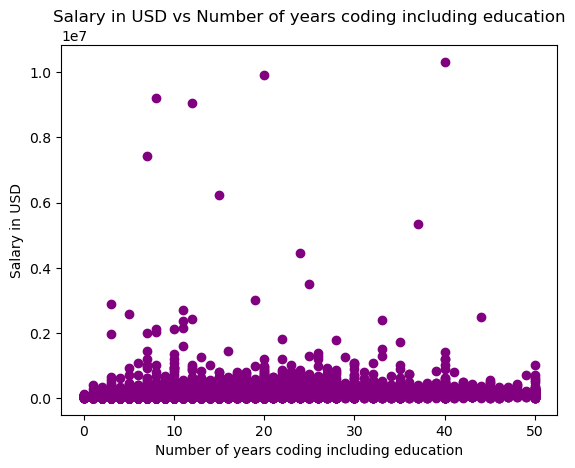

In [ ]:
#Graph 2: Does number of years of coding experience affect the salary you earn?
yrs_sal = data.loc[:,['Q10','Q82']]
yrs_coding = yrs_sal['Q10']
salary_usd = yrs_sal['Q82']

plt.scatter(yrs_coding,salary_usd, color = 'Purple')
plt.title('Salary in USD vs Number of years coding including education')
plt.ylabel('Salary in USD')
plt.xlabel('Number of years coding including education')


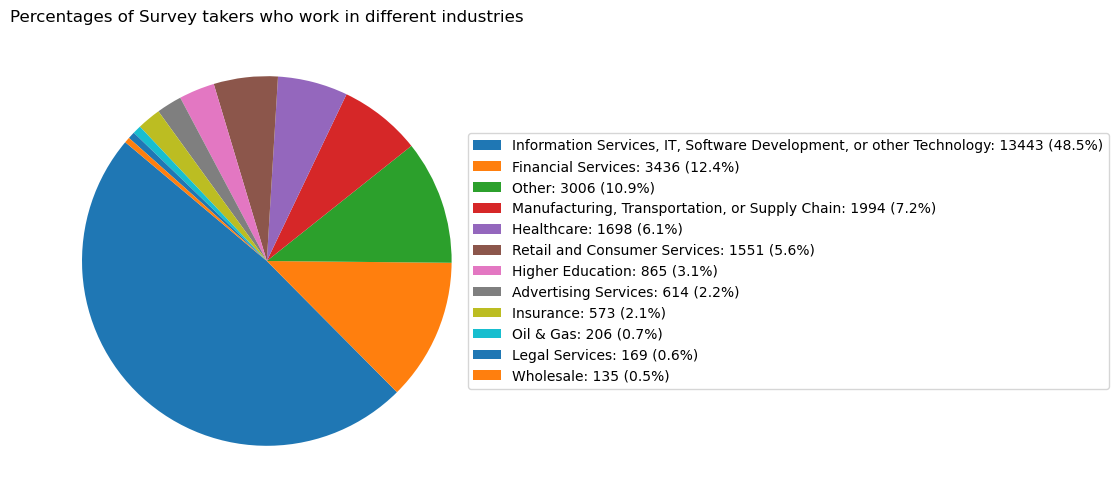

In [ ]:
#Graph 3 - What industries do software developers or anyone who codes [described in survey] work the most in?

data['Q79'].isnull().sum()
ind_survey = data['Q79']
ind_survey = ind_survey.dropna()

ind_survey_counts  = ind_survey.value_counts()

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors
patches, _ = plt.pie(ind_survey_counts, colors=colors, startangle=140)

legend_labels = [f"{type}: {count} ({100*count/sum(ind_survey_counts):.1f}%)" for type, count in ind_survey_counts.items()]
plt.legend(patches, legend_labels, loc='center left', bbox_to_anchor=(0.92, 0.5), fontsize='medium')

plt.title('Percentages of Survey takers who work in different industries')

plt.show()



In [ ]:
pd.options.display.float_format = '{:.2f}'.format

#First extracting both columns related to remote from our data - the column with all labels remote and then the salaries associated with it.
remote_jobs = data.loc[(data['Q4'] == 'Remote'),['Q4','Q82']]

#Extracting the salary column from remote jobs and original descriptive statistics and also then find the amount of nullvalues in that column
remote_jobs_salary = remote_jobs.iloc[:,1]
print('null values are',remote_jobs.iloc[:,0].isnull().sum())
print()
print(remote_jobs_salary.describe())

null values are 0

count      21089.00
mean      107047.17
std       144581.87
min            1.00
25%        49655.00
50%        87813.00
75%       142759.00
max     10319366.00
Name: Q82, dtype: float64


In [ ]:
#First extracting both columns related to inperson from our data - the column with all labels inperson and then the salaries associated with it.
inperson_jobs = data.loc[(data['Q4'] == 'In-person'), ['Q4','Q82']]


#Extracting the salary column from inperson jobs, describing its stats and find the amount of nullvalues in that column
inperson_jobs_salary = inperson_jobs.iloc[:,1]
print(inperson_jobs_salary.describe())
print()
print('null values are', inperson_jobs.iloc[:,0].isnull().sum())

count      6514.00
mean      70692.56
std      163928.23
min           1.00
25%       21600.00
50%       51973.00
75%       86271.00
max     9915585.00
Name: Q82, dtype: float64

null values are 0


In [ ]:
#Eliminating Outliers

inperson_jobs_salary = inperson_jobs_salary[(inperson_jobs_salary > 5000) & (inperson_jobs_salary < 600000)]
remote_jobs_salary = remote_jobs_salary[(remote_jobs_salary > 5000) & (remote_jobs_salary < 600000)]

In [ ]:
# Remote jobs and Inperson salary descriptive statistics calculations and presenting them in a DataFrame

df1 = pd.DataFrame(remote_jobs_salary).describe().transpose()
df2 = pd.DataFrame(inperson_jobs_salary).describe().transpose()

des_stats_remin = pd.concat([df1,df2])
des_stats_remin = des_stats_remin.set_index(pd.Index(['Remote Stats', 'In Person Stats']))

des_stats_remin

,count,mean,std,min,25%,50%,75%,max
Remote Stats,20197.00,106580.75,74024.80,5004.00,53545.00,90919.00,145000.00,580000.00
In Person Stats,5923.00,71252.94,63586.63,5020.00,30661.50,55687.00,91026.00,555582.00


In [ ]:
#Equal Variances Test

var_statistic_2, p_value_var_2 = stats.bartlett(remote_jobs_salary, inperson_jobs_salary)

print("As", p_value_var_2, " for Bartlett is lesser than our threshold of 0.05, variances are not equal")

#Independent Sample T-test calculation
t_statistic_salary, p_value_salary = stats.ttest_ind(remote_jobs_salary, inperson_jobs_salary,equal_var= False)
print()
print('T-Statistic is :', t_statistic_salary)
print('p value is:', p_value_salary)
print()

#Hypothesis test result

if p_value_salary < 0.05:
  print('The Null hypothesis that the means are equal is rejected because observed p value is less than our pre-set threshold of 0.05')
else:
  print('As P value is higher than 0.05, we Fail to reject the null hypothesis')

As 2.272979207315048e-45  for Bartlett is lesser than our threshold of 0.05, variances are not equal

T-Statistic is : 36.17048078641064
p value is: 7.373546450686058e-271

The Null hypothesis that the means are equal is rejected because observed p value is less than our pre-set threshold of 0.05


In [ ]:
#Bootstrapping Function Creation

def bootstrapping(data, values_n):
  n = data.count()
  bootstrap_means = []

  for i in range(values_n):
    gen_sample = np.random.choice(data, size = n, replace = True)
    sample_mean = gen_sample.mean()
    bootstrap_means.append(sample_mean)

    bootstrap_means_array = np.array(bootstrap_means)


  return bootstrap_means_array

In [ ]:
#Creating our bootstrapped data set for remote salaries

bootstrap_means_remote = bootstrapping(remote_jobs_salary, 10000)

In [ ]:
#Creating our bootstrapped data set for inperson salaries

bootstrap_means_inperson = bootstrapping(inperson_jobs_salary,10000)

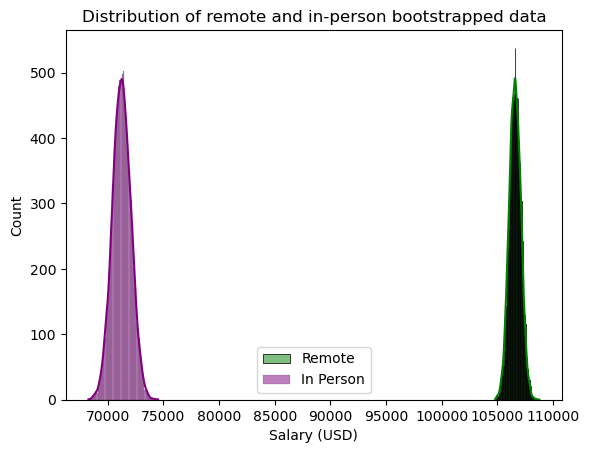

In [ ]:
#Plotting the bootstrapped data set for both remote and in-person.. We expect to see a normal distribution for both due to the Central Limit Theorem


sns.histplot(data = bootstrap_means_remote, kde = True, label = 'Remote', color = 'Green')
sns.histplot(bootstrap_means_inperson, kde = True, label = 'In Person', color = 'Purple')

plt.title('Distribution of remote and in-person bootstrapped data')
plt.xlabel('Salary (USD)')
plt.legend()




In [ ]:
#Creating of a function to calculate difference in means [Not Required but makes it easier in the future to just call the function]

def diff_in_means(data1, data2):
  diff_in_means = np.array(data1 - data2)
  return diff_in_means


In [ ]:
#Defining a function to normalize data

def normalize(data1):
  normalized_data = data1/np.std(data1)
  return normalized_data

Text(0.5, 0, 'Salary (USD)')

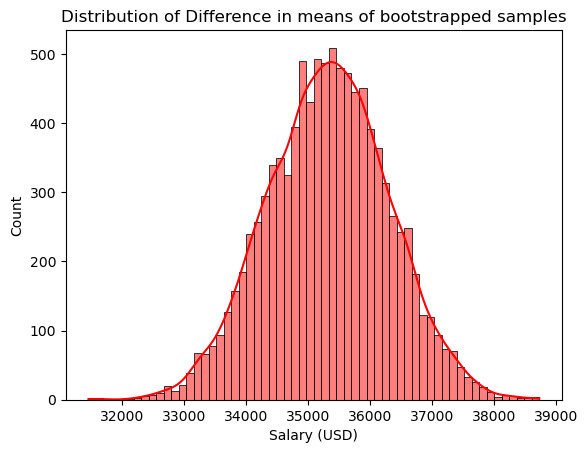

In [ ]:
#Calculating the difference in our bootstrapped means for in-person and remote and then plotting this difference

bootstrap_diff_means_remin = diff_in_means(bootstrap_means_remote,bootstrap_means_inperson)

sns.histplot(bootstrap_diff_means_remin, kde = True, color = 'red')
plt.title('Distribution of Difference in means of bootstrapped samples')
plt.xlabel('Salary (USD)')


Text(0.5, 0, 'Salary (USD)')

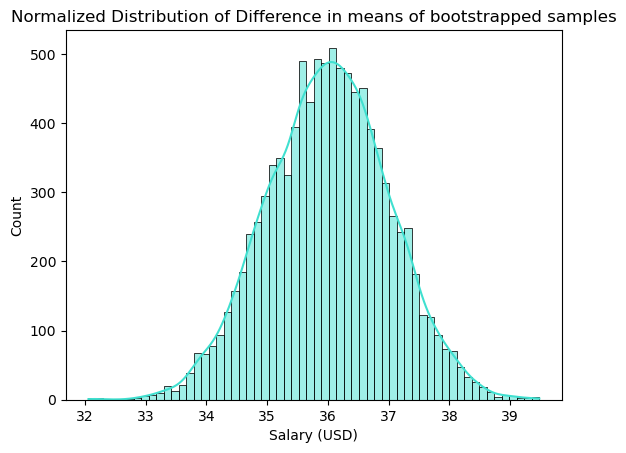

In [ ]:
#Calculating then normalized version of the difference in bootstrapped means data and then plotting it

normalized_diff_remin = normalize(bootstrap_diff_means_remin)

sns.histplot(normalized_diff_remin, kde = True, color = 'turquoise')
plt.title('Normalized Distribution of Difference in means of bootstrapped samples')
plt.xlabel('Salary (USD)')

In [ ]:
#Defining a function to extract t-statistic and p value on normalized bootstrapped difference in means samples.
# This function only works when the original difference in means is positive.[For the p value].We will keep all forward calculations as such

def t_test_bootstrap(data):
  t_statistic = data.mean()
  p_value = (np.sum(data<= 0)/len(data))
  return t_statistic, p_value

In [ ]:
#Extracting and computing t-test and pvalue from  bootstrapped data

t_statistic_bootstrap, p_value_bootstrap = t_test_bootstrap(normalized_diff_remin)
print('t_statistic_is',t_statistic_bootstrap, 'and pvalue is', p_value_bootstrap)


t_statistic_is 36.0053464877757 and pvalue is 0.0


In [ ]:
#Performing Formulaic t-test from scipy.stats the same as on the bootstrapped data

t_statistic_bootstrap_pure, p_value_bootstrap_pure = stats.ttest_ind(bootstrap_means_remote, bootstrap_means_inperson)
print('t_statistic_is',t_statistic_bootstrap_pure, 'and pvalue is', p_value_bootstrap_pure)

t_statistic_is 3613.653117390659 and pvalue is 0.0


In [ ]:
#Extracting salaries associated with each education level

masters_degree_data = data.loc[(data['Q6'] == 'Masters degree'), ['Q6', 'Q82']]
bachelors_degree_data = data.loc[(data['Q6'] == 'Bachelors degree'), ['Q6','Q82']]
professional_degree_data = data.loc[(data['Q6'] == 'Professional degree'), ['Q6', 'Q82']]

masters_degree_salary = masters_degree_data.iloc[:,1]
bachelors_degree_salary = bachelors_degree_data.iloc[:,1]
professional_degree_salary = professional_degree_data.iloc[:,1]

print(masters_degree_salary.describe())
print(bachelors_degree_salary.describe())
print(professional_degree_salary.describe())
print()

#Equal Variances test

var_statistic_anov, p_value_var_anov = stats.bartlett(remote_jobs_salary, inperson_jobs_salary)
print('Equal variances p-test is', p_value_var_anov, 'which states that variances are not equal')


count     13000.00
mean      95785.96
std      108558.16
min           1.00
25%       49756.00
50%       74963.00
75%      117798.00
max     6229051.00
Name: Q82, dtype: float64
count      22471.00
mean       99649.42
std       168141.27
min            1.00
25%        42836.00
50%        79739.00
75%       130000.00
max     10319366.00
Name: Q82, dtype: float64
count      2288.00
mean     110296.15
std      166288.77
min           3.00
25%       50205.75
50%       80690.00
75%      129177.25
max     5354477.00
Name: Q82, dtype: float64

Equal variances p-test is 2.272979207315048e-45 which states that variances are not equal


In [ ]:
#Eliminating outliers based on same conditions again as data is extracted from original data

masters_degree_salary = masters_degree_salary[(masters_degree_salary > 5000) & (masters_degree_salary< 600000)]
bachelors_degree_salary = bachelors_degree_salary[(bachelors_degree_salary > 5000) & (bachelors_degree_salary < 600000)]
professional_degree_salary = professional_degree_salary[(professional_degree_salary> 5000) & (professional_degree_salary< 600000)]


In [ ]:
#Initializing different dataframes of salaries with each education data for use in pinguoins unequal variances test [only accepts dataframe syntax]- performed in code and explained in report

masters_degree_data = masters_degree_data[(masters_degree_data.iloc[:, 1] > 5000) & (masters_degree_data.iloc[:, 1] <600000)]
bachelors_degree_data = bachelors_degree_data[(bachelors_degree_data.iloc[:, 1] > 5000) & (bachelors_degree_data.iloc[:, 1] < 600000)]
professional_degree_data = professional_degree_data[(professional_degree_data.iloc[:, 1] > 5000) & (professional_degree_data.iloc[:, 1] < 600000)]

In [ ]:
#describing all 3 different education's level salary [descriptive statistics] and presenting them in a dataframe

df_an_m = pd.DataFrame(masters_degree_salary).describe().transpose()
df_an_b = pd.DataFrame(bachelors_degree_salary).describe().transpose()
df_an_p = pd.DataFrame(professional_degree_salary).describe().transpose()

des_stats_edu = pd.concat([df_an_m,df_an_b,df_an_p])
des_stats_edu = des_stats_edu.set_index(pd.Index(["Master's Stats", "Bachelor's Stats", "Professional's Stats"]))

des_stats_edu

,count,mean,std,min,25%,50%,75%,max
Master's Stats,12576.00,94771.70,68282.16,5029.00,52192.75,76511.00,117798.00,594811.00
Bachelor's Stats,21373.00,98892.84,73613.36,5004.00,48190.00,82458.00,132208.00,575000.00
Professional's Stats,2205.00,103944.04,79218.18,5072.00,53379.00,82459.00,130000.00,564086.00


In [ ]:
pd.reset_option('display.float_format')

#Creating a new Pandas Dataframe for use in Pinguoins unequal variances welchs ANOVA Test

anova_unequal_variance_data = pd.concat([masters_degree_data, bachelors_degree_data,professional_degree_data], axis = 0)
anova_result = pg.welch_anova(data = anova_unequal_variance_data, dv = 'Q82', between = 'Q6')
print('The anova_result p value is',anova_result.loc[0,['p-unc']].values, 'which is lower than our threshold of 0.05 which means the null hypothesis that the means of the 3 groups are equal is rejected')

The anova_result p value is [7.060064909868106e-10] which is lower than our threshold of 0.05 which means the null hypothesis that the means of the 3 groups are equal is rejected


In [ ]:
#Bootstrapping each data set to get our sampling means distribution for each data set

bootstrap_masters_degree = bootstrapping(masters_degree_salary, 10000)
bootstrap_bachelors_degree = bootstrapping(bachelors_degree_salary, 10000)
bootstrap_professional_degree = bootstrapping(professional_degree_salary,10000)

Text(0.5, 0, 'Salary (USD)')

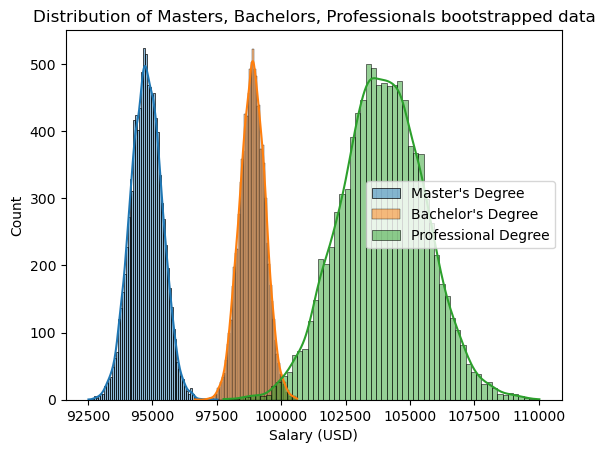

In [ ]:
#Plotting the bootstrapped data for our 3 samples

sns.histplot(bootstrap_masters_degree, kde = True, label = "Master's Degree")
sns.histplot(bootstrap_bachelors_degree, kde = True, label = "Bachelor's Degree")
sns.histplot(bootstrap_professional_degree, kde = True, label = "Professional Degree")
plt.legend()

plt.title('Distribution of Masters, Bachelors, Professionals bootstrapped data')
plt.xlabel('Salary (USD)')


Text(0.5, 0, 'Salary (USD)')

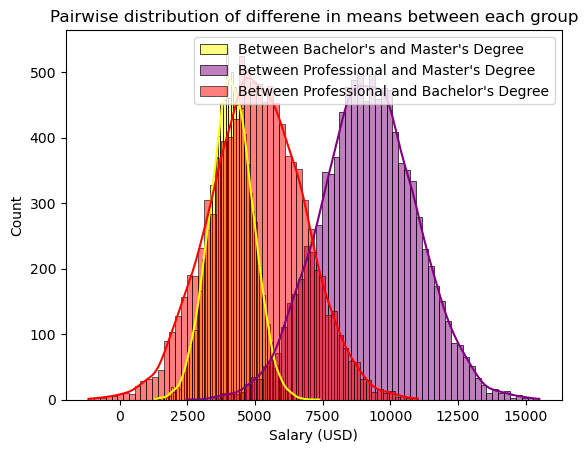

In [ ]:
# Computing the Difference in Means for bootstrapped data [Bachelors - Masters], [Professional - Bachelors], [Professional - Masters]
# and also plotting the distribution of the difference in means for each of the above


bachelors_masters_diff = diff_in_means(bootstrap_bachelors_degree, bootstrap_masters_degree)
professional_masters_diff = diff_in_means(bootstrap_professional_degree, bootstrap_masters_degree)
professional_bachelors_diff = diff_in_means(bootstrap_professional_degree,bootstrap_bachelors_degree)

sns.histplot(bachelors_masters_diff, kde = 'true', label = "Between Bachelor's and Master's Degree", color = 'yellow')
sns.histplot(professional_masters_diff, kde = 'true', label = "Between Professional and Master's Degree", color = 'purple')
sns.histplot(professional_bachelors_diff, kde = 'true', label = "Between Professional and Bachelor's Degree", color = 'red')

plt.legend()

plt.title('Pairwise distribution of differene in means between each group')
plt.xlabel('Salary (USD)')


Text(0.5, 0, 'Salary (USD)')

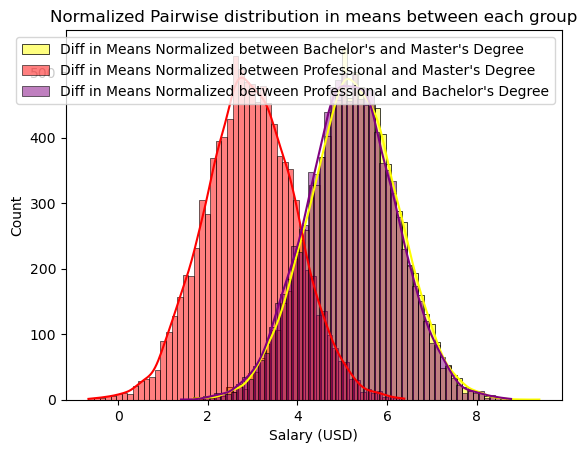

In [ ]:
#normalizing each difference in means and then plotting the results

norm_bach_mast = normalize(bachelors_masters_diff)
norm_prof_bach = normalize(professional_bachelors_diff)
norm_prof_mast = normalize(professional_masters_diff)

sns.histplot(norm_bach_mast, kde = 'true', label = "Diff in Means Normalized between Bachelor's and Master's Degree", color = 'yellow')
sns.histplot(norm_prof_bach, kde = 'true', label = "Diff in Means Normalized between Professional and Master's Degree", color = 'red')
sns.histplot(norm_prof_mast, kde = 'true', label = "Diff in Means Normalized between Professional and Bachelor's Degree", color = 'purple')

plt.legend()

plt.title('Normalized Pairwise distribution in means between each group')
plt.xlabel('Salary (USD)')


In [ ]:
#Making a pandas Dataframe with the boostrapped data for part Q3.d) for use in Penguion

anova_bootstrap_masters = pd.DataFrame({'Bootstrapped Sample': ['Masters Degree'] * len(bootstrap_masters_degree),'Salary': bootstrap_masters_degree})
anova_bootstrap_bachelors = pd.DataFrame({'Bootstrapped Sample': ['Bachelors Degree'] * len(bootstrap_bachelors_degree),'Salary': bootstrap_bachelors_degree})
anova_bootstrap_professional = pd.DataFrame({'Bootstrapped Sample': ['Professional Degree'] * len(bootstrap_professional_degree),'Salary': bootstrap_professional_degree})

anova_bootstrap = pd.concat([anova_bootstrap_masters, anova_bootstrap_bachelors, anova_bootstrap_professional], axis = 0)

In [ ]:
#ANOVA results on the bootstrapped data using Pinguoin unequal variances Welchs' Test

anova_result_bootstrap = pg.welch_anova(data = anova_bootstrap, dv = 'Salary', between = 'Bootstrapped Sample')
print(anova_result_bootstrap)

                Source  ddof1         ddof2              F  p-unc       np2
0  Bootstrapped Sample      2  18144.646803  216519.600663    0.0  0.926638


In [ ]:
#extracting t values and p values for all 3 distributions [normalized difference in means]

t_bach_mast, p_bach_mast = t_test_bootstrap(norm_bach_mast)
print('Tstatistic for bach_mast is', t_bach_mast,' and pvalue for bach_mast is', p_bach_mast)

t_prof_bach, p_prof_bach = t_test_bootstrap(norm_prof_bach)
print('Tstatistic for prof_bach is', t_prof_bach,' and pvalue for prof_bach is', p_prof_bach)

t_prof_mast, p_prof_mast = t_test_bootstrap(norm_prof_mast)
print('Tstatistic for prof_mast is', t_prof_mast,' and pvalue for prof_mast is', p_prof_mast)


Tstatistic for bach_mast is 5.254776522736773  and pvalue for bach_mast is 0.0
Tstatistic for prof_bach is 2.930386548653522  and pvalue for prof_bach is 0.002
Tstatistic for prof_mast is 5.190265750749681  and pvalue for prof_mast is 0.0
